In [1]:
"""
autor:Alexandre
date:2024/09/22
"""

'\nautor:Alexandre\ndate:2024/09/22\n'

# **Tryiing to fit a polynomial function with pytorch**

In [2]:
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import torch

## Data generation

In [5]:
# polynomial function
def def_f(a, b, c):
    def f(x):
        return a*x**2 + b*x + c
    return f

In [24]:
# data generation
a = 4
b = -10
c = 30

polynôme_1 = def_f(a=a, b=b, c=c)
x = np.linspace(-10, 10, 1000)
y = polynôme_1(x=x)

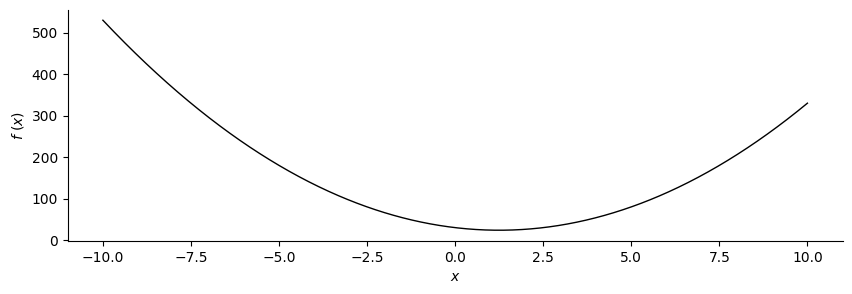

In [25]:
# dataset visualisation
fig,ax = plt.subplots(
    nrows=1,
    ncols=1, 
    figsize=(10,3)
    )

ax.plot(
    x,
    y,
    color="black",
    linewidth=1
    )
ax.spines[["top","right"]].set_visible(False)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f$ $(x)$")
plt.show()

## Training preparation

In [48]:
# push data under the tensor type and in the dataloader
X, Y = torch.Tensor(x), torch.Tensor(y)
batch_size = 32

loader = DataLoader(
    TensorDataset(X,Y), batch_size=batch_size, shuffle=True
)

In [49]:
# choose of the loss function
criterion = torch.nn.MSELoss(reduction="mean")

In [50]:
class Model(torch.nn.Module):
    def __init__(self, a=1, b=1, c=1):
        super(Model, self).__init__()
        
        self.a = torch.nn.Parameter(a * torch.ones(1))
        self.b = torch.nn.Parameter(b * torch.ones(1))
        self.c = torch.nn.Parameter(c * torch.ones(1))
    
    def forward(self, x):
        
        output = self.a*x**2 + self.b*x + self.c
        
        return output

In [54]:
def training(
    loader=loader,

    lr = 1e-2,
    betas = (0.9, 0.999),
    num_epochs = 5_000,
    amsgrad = True,
    device = "cuda",

    criterion=criterion
):

    # model
    model = Model(
        a=np.random.randint(0,100),
        b=np.random.randint(0,100),
        c=np.random.randint(0,100)
    ).to(device)

    # optimizer
    optimizer = torch.optim.Adam(
        model.parameters(), 
        lr=lr, 
        betas=betas, 
        amsgrad=amsgrad
    )

    losses = []

    for epoch in tqdm(range(num_epochs)):
        
        model.train()
        loss_ = []
        
        for X_, Y_ in loader:
            
            X_, Y_ = X_.to(device), Y_.to(device)
            output = model(X_)
            
            loss = criterion(output, Y_)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_.append(loss.item())
        
        losses.append(np.sum(loss_))

    return model, losses


## Training

In [67]:
model, loss = training(device="cpu", num_epochs=1_000)

100%|██████████| 1000/1000 [00:20<00:00, 47.88it/s]


In [68]:
polynôme_1_pred = def_f(a=model.a.cpu().detach().numpy(),
                        b=model.b.cpu().detach().numpy(),
                        c=model.c.cpu().detach().numpy())

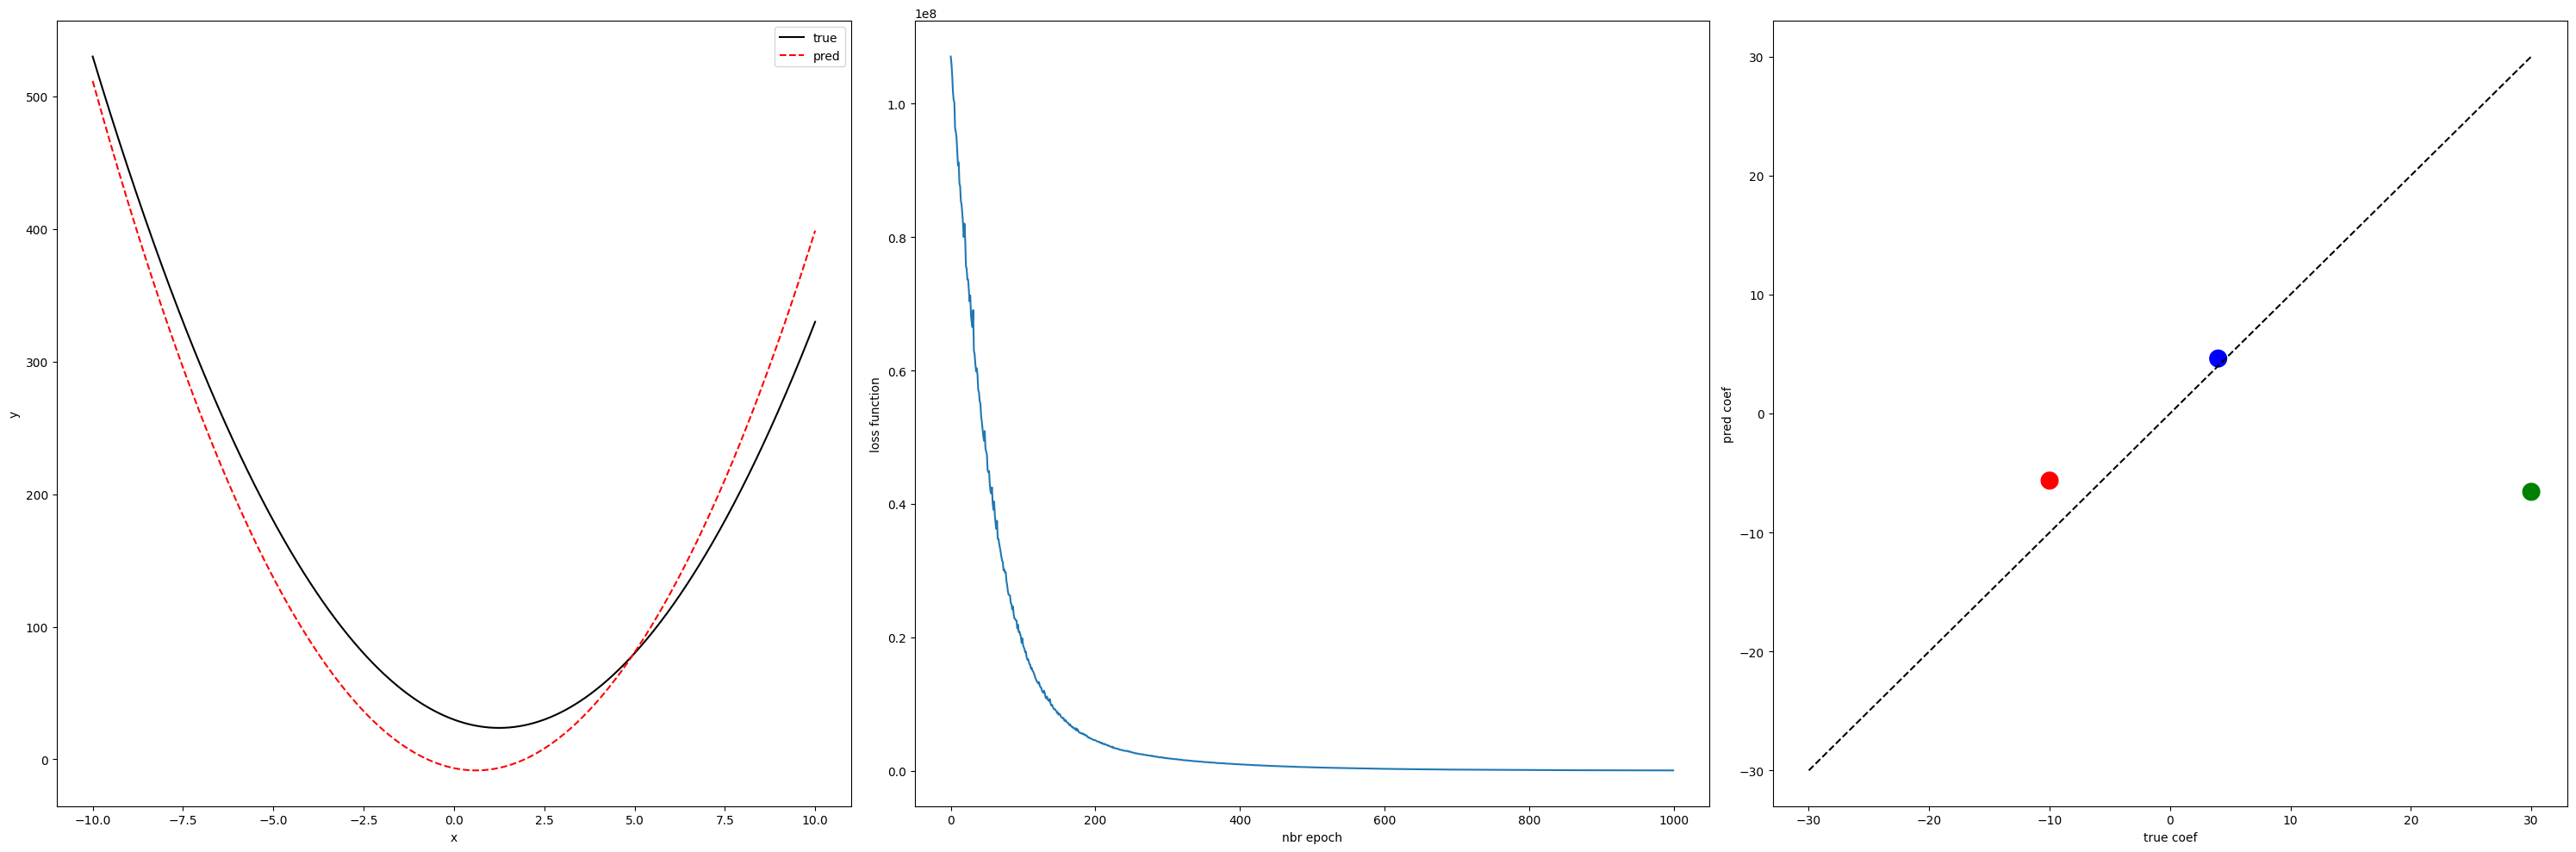

In [69]:
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
ax[0].plot(x, polynôme_1(x), label="true", color="black")
ax[0].plot(x, polynôme_1_pred(x), label="pred", linestyle="dashed", color="red")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].legend()

ax[1].plot(range(len(loss)), loss)
ax[1].set_xlabel("nbr epoch")
ax[1].set_ylabel("loss function")

ax[2].scatter([a, b, c], 
              [model.a.cpu().detach().numpy(),
               model.b.cpu().detach().numpy(),
               model.c.cpu().detach().numpy()],
               s=200,
               c=["blue", "red", "green"])
ax[2].plot(np.linspace(-30, 30, 100), np.linspace(-30, 30, 100), linestyle="dashed", color="black")
ax[2].set_xlabel("true coef")
ax[2].set_ylabel("pred coef")

plt.tight_layout()
plt.show()